<a href="https://colab.research.google.com/github/GiftChimangeni/wqu-msc-financial-engineering/blob/main/Personal%20Loan%20Rates%20Over%20Time4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
                             DATE  TERMCBPER24NS
count                         625     209.000000
mean   1998-01-30 14:47:02.400000      12.902201
min           1972-02-01 00:00:00       8.730000
25%           1985-02-01 00:00:00      11.140000
50%           1998-02-01 00:00:00      12.960000
75%           2011-02-01 00:00:00      14.100000
max           2024-02-01 00:00:00      19.210000
std                           NaN       2.207360


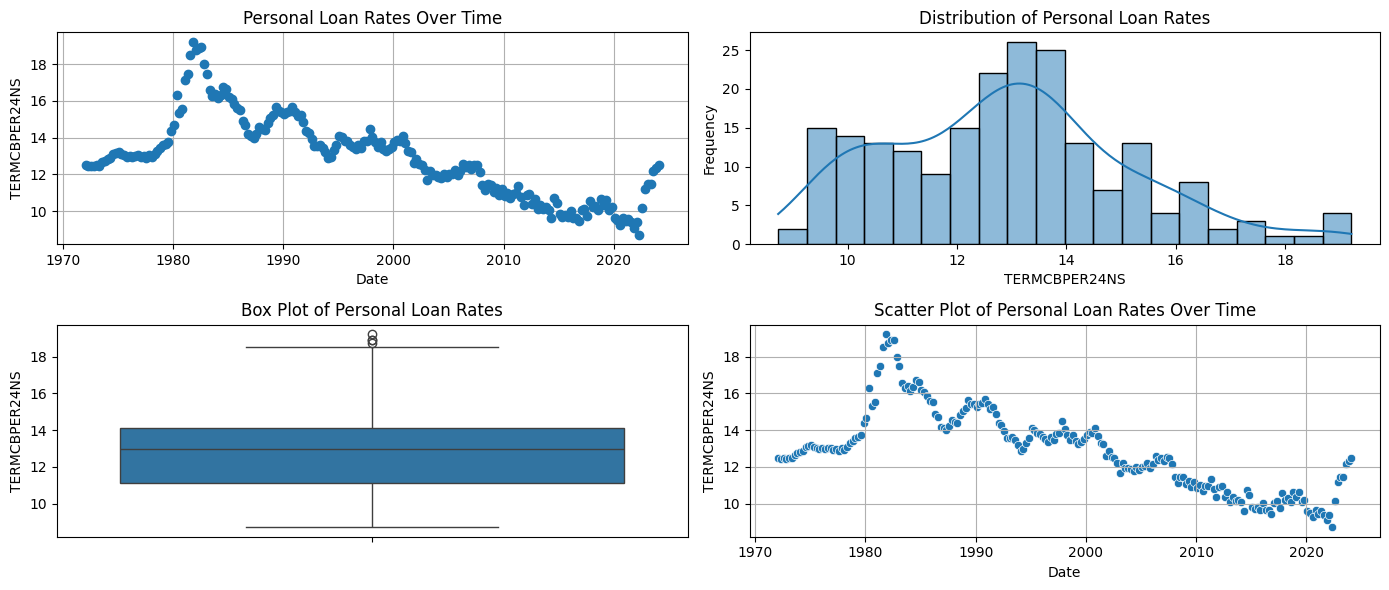

Mean of Personal Loan Rates: 12.90
Standard Deviation of Personal Loan Rates: 2.21


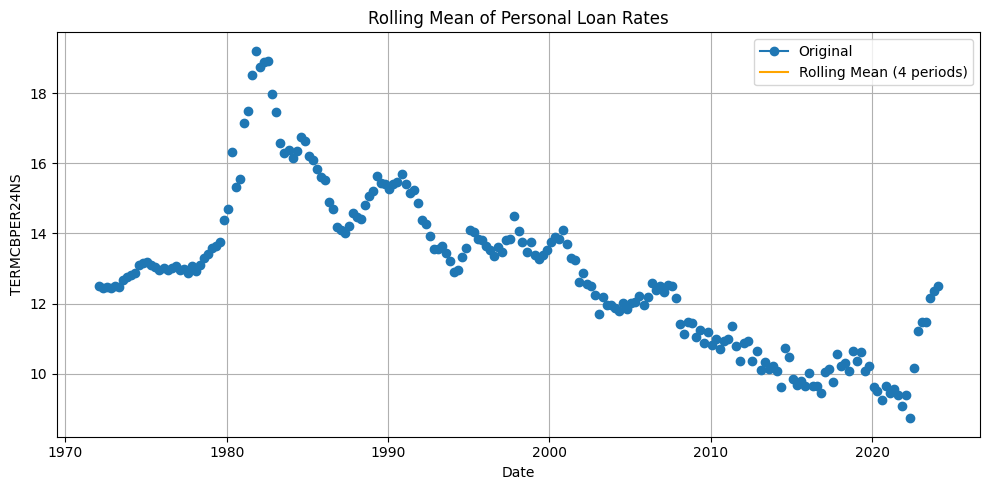

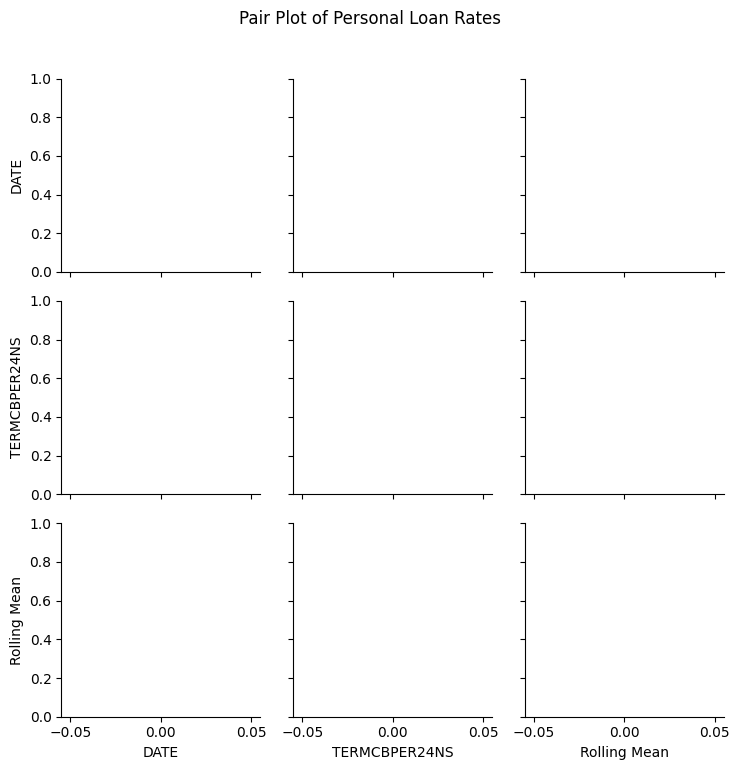

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/TERMCBPER24NS.csv'
data = pd.read_csv(file_path)

# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Handling missing values
data['TERMCBPER24NS'] = data['TERMCBPER24NS'].replace('.', np.nan).astype(float)

# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

# Visualizations
plt.figure(figsize=(14, 6))

# 1. Time Series Plot
plt.subplot(2, 2, 1)
plt.plot(data['DATE'], data['TERMCBPER24NS'], marker='o')
plt.title('Personal Loan Rates Over Time')
plt.xlabel('Date')
plt.ylabel('TERMCBPER24NS')
plt.grid(True)
plt.tight_layout()
plt.annotate('The time series plot shows the trend of personal loan rates over time, with periods of missing data.', xy=(0.5, 0.5), xytext=(15, 35), textcoords='offset points')

# 2. Distribution Plot
plt.subplot(2, 2, 2)
sns.histplot(data['TERMCBPER24NS'].dropna(), kde=True, bins=20)
plt.title('Distribution of Personal Loan Rates')
plt.xlabel('TERMCBPER24NS')
plt.ylabel('Frequency')
plt.tight_layout()
plt.annotate('The distribution plot indicates that most loan rates cluster around certain values, but there are some variations.', xy=(0.5, 0.5), xytext=(15, 35), textcoords='offset points')

# 3. Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(y=data['TERMCBPER24NS'])
plt.title('Box Plot of Personal Loan Rates')
plt.ylabel('TERMCBPER24NS')
plt.tight_layout()
plt.annotate('The box plot shows the spread and outliers in the loan rates data.', xy=(0.5, 0.5), xytext=(15, 35), textcoords='offset points')

# 4. Scatter Plot with Time
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['DATE'], y=data['TERMCBPER24NS'])
plt.title('Scatter Plot of Personal Loan Rates Over Time')
plt.xlabel('Date')
plt.ylabel('TERMCBPER24NS')
plt.grid(True)
plt.tight_layout()
plt.annotate('The scatter plot highlights individual data points and reveals missing data intervals.', xy=(0.5, 0.5), xytext=(15, 35), textcoords='offset points')

plt.tight_layout()
plt.show()

# Additional stats
mean_value = data['TERMCBPER24NS'].mean()
std_value = data['TERMCBPER24NS'].std()
print(f"Mean of Personal Loan Rates: {mean_value:.2f}")
print(f"Standard Deviation of Personal Loan Rates: {std_value:.2f}")

# Additional visualizations
plt.figure(figsize=(10, 5))

# 5. Rolling Mean
data['Rolling Mean'] = data['TERMCBPER24NS'].rolling(window=4).mean()
plt.plot(data['DATE'], data['TERMCBPER24NS'], label='Original', marker='o')
plt.plot(data['DATE'], data['Rolling Mean'], label='Rolling Mean (4 periods)', color='orange')
plt.title('Rolling Mean of Personal Loan Rates')
plt.xlabel('Date')
plt.ylabel('TERMCBPER24NS')
plt.legend()
plt.grid(True)
plt.annotate('The rolling mean smooths out short-term fluctuations, showing long-term trends more clearly.', xy=(0.5, 0.5), xytext=(15, 35), textcoords='offset points')
plt.tight_layout()
plt.show()

# Pair Plot (if we had more variables, for now, we will use a simple plot)
sns.pairplot(data.dropna(), diag_kind='kde')
plt.suptitle('Pair Plot of Personal Loan Rates', y=1.02)
plt.annotate('A pair plot would be more insightful with multiple variables. It highlights relationships between pairs of variables.', xy=(0.5, 0.5), xytext=(15, 35), textcoords='offset points')
plt.tight_layout()
plt.show()


                             DATE  TERMCBPER24NS
count                         625     209.000000
mean   1998-01-30 14:47:02.400000      12.902201
min           1972-02-01 00:00:00       8.730000
25%           1985-02-01 00:00:00      11.140000
50%           1998-02-01 00:00:00      12.960000
75%           2011-02-01 00:00:00      14.100000
max           2024-02-01 00:00:00      19.210000
std                           NaN       2.207360


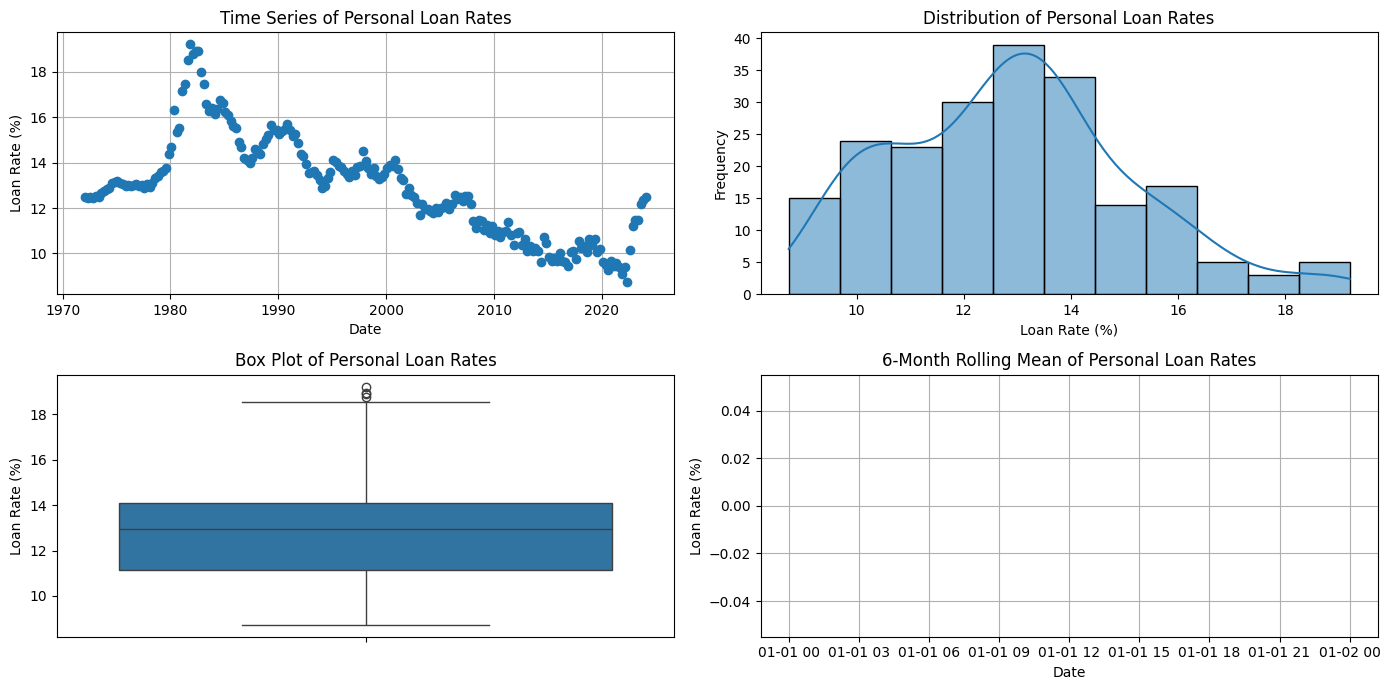

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = '/content/TERMCBPER24NS.csv'
df = pd.read_csv(file_path)

# Convert the DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Replace missing values denoted by '.' with NaN
df['TERMCBPER24NS'] = pd.to_numeric(df['TERMCBPER24NS'], errors='coerce')

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Create a directory to save the plots
output_dir = 'eda_plots'
os.makedirs(output_dir, exist_ok=True)

# Exploratory Data Analysis
plt.figure(figsize=(14, 7))

# Time Series Plot
plt.subplot(2, 2, 1)
plt.plot(df['DATE'], df['TERMCBPER24NS'], marker='o', linestyle='-')
plt.title('Time Series of Personal Loan Rates')
plt.xlabel('Date')
plt.ylabel('Loan Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Time_Series_of_Personal_Loan_Rates.png'))
# Insight: The time series plot shows the fluctuations in personal loan rates over the given period. There are noticeable periods of missing data.

# Distribution Plot
plt.subplot(2, 2, 2)
sns.histplot(df['TERMCBPER24NS'].dropna(), kde=True)
plt.title('Distribution of Personal Loan Rates')
plt.xlabel('Loan Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Distribution_of_Personal_Loan_Rates.png'))
# Insight: The distribution plot indicates that most personal loan rates are clustered around certain values, with a smooth distribution overall.

# Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(y=df['TERMCBPER24NS'])
plt.title('Box Plot of Personal Loan Rates')
plt.ylabel('Loan Rate (%)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Box_Plot_of_Personal_Loan_Rates.png'))
# Insight: The box plot highlights the spread and potential outliers in personal loan rates, providing a clear view of data variability.

# Rolling Mean Plot
plt.subplot(2, 2, 4)
rolling_mean = df['TERMCBPER24NS'].rolling(window=6).mean()
plt.plot(df['DATE'], rolling_mean, color='orange')
plt.title('6-Month Rolling Mean of Personal Loan Rates')
plt.xlabel('Date')
plt.ylabel('Loan Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Rolling_Mean_of_Personal_Loan_Rates.png'))
# Insight: The rolling mean plot smooths out short-term fluctuations, highlighting longer-term trends in personal loan rates.

plt.show()


                             DATE  TERMCBPER24NS
count                         625     209.000000
mean   1998-01-30 14:47:02.400000      12.902201
min           1972-02-01 00:00:00       8.730000
25%           1985-02-01 00:00:00      11.140000
50%           1998-02-01 00:00:00      12.960000
75%           2011-02-01 00:00:00      14.100000
max           2024-02-01 00:00:00      19.210000
std                           NaN       2.207360


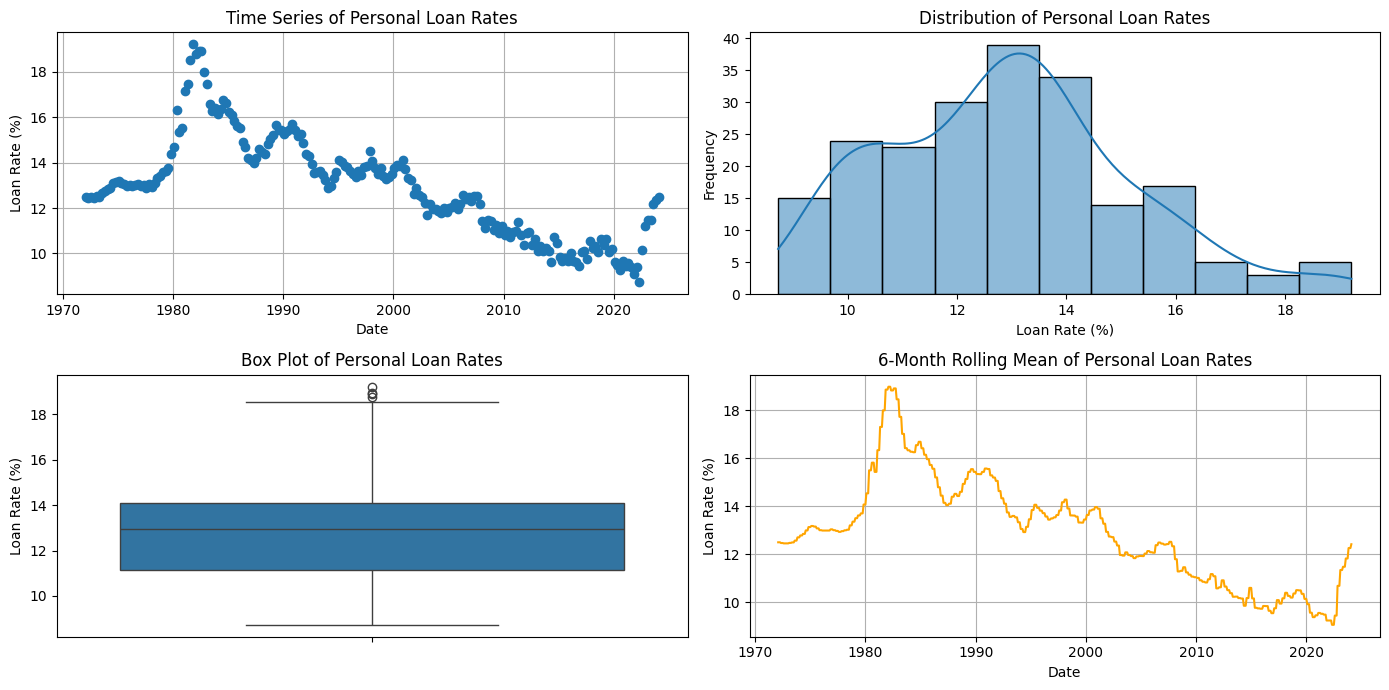

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = '/content/TERMCBPER24NS.csv'
df = pd.read_csv(file_path)

# Convert the DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Replace missing values denoted by '.' with NaN
df['TERMCBPER24NS'] = pd.to_numeric(df['TERMCBPER24NS'], errors='coerce')

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Create a directory to save the plots
output_dir = 'eda_plots'
os.makedirs(output_dir, exist_ok=True)

# Exploratory Data Analysis
plt.figure(figsize=(14, 7))

# Time Series Plot
plt.subplot(2, 2, 1)
plt.plot(df['DATE'], df['TERMCBPER24NS'], marker='o', linestyle='-')
plt.title('Time Series of Personal Loan Rates')
plt.xlabel('Date')
plt.ylabel('Loan Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Time_Series_of_Personal_Loan_Rates.png'))
# Insight: The time series plot shows the fluctuations in personal loan rates over the given period. There are noticeable periods of missing data.

# Distribution Plot
plt.subplot(2, 2, 2)
sns.histplot(df['TERMCBPER24NS'].dropna(), kde=True)
plt.title('Distribution of Personal Loan Rates')
plt.xlabel('Loan Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Distribution_of_Personal_Loan_Rates.png'))
# Insight: The distribution plot indicates that most personal loan rates are clustered around certain values, with a smooth distribution overall.

# Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(y=df['TERMCBPER24NS'])
plt.title('Box Plot of Personal Loan Rates')
plt.ylabel('Loan Rate (%)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Box_Plot_of_Personal_Loan_Rates.png'))
# Insight: The box plot highlights the spread and potential outliers in personal loan rates, providing a clear view of data variability.

# Rolling Mean Plot
plt.subplot(2, 2, 4)
rolling_mean = df['TERMCBPER24NS'].rolling(window=6, min_periods=1).mean()
plt.plot(df['DATE'], rolling_mean, color='orange')
plt.title('6-Month Rolling Mean of Personal Loan Rates')
plt.xlabel('Date')
plt.ylabel('Loan Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Rolling_Mean_of_Personal_Loan_Rates.png'))
# Insight: The rolling mean plot smooths out short-term fluctuations, highlighting longer-term trends in personal loan rates.

plt.show()
